# Image Processing With Neural Networks
>  Convolutional neural networks use the data that is represented in images to learn. In this chapter, we will probe data in images, and we will learn how to use Keras to train a neural network to classify objects that appear in images.

- toc: true 
- badges: true
- comments: true
- author: Lucas Nunes
- categories: [Datacamp]
- image: images/datacamp/___

> Note: This is a summary of the course's chapter 1 exercises "Image Processing with Keras in Python" at datacamp. <br>[Github repo](https://github.com/lnunesAI/Datacamp/) / [Course link](https://www.datacamp.com/tracks/machine-learning-scientist-with-python)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
plt.rcParams['figure.figsize'] = (8, 8)

## Introducing convolutional neural networks

### Images as data: visualizations

<p>To display image data, you will rely on Python's <a href="https://matplotlib.org/" target="_blank" rel="noopener noreferrer">Matplotlib</a> library, and specifically use matplotlib's <code>pyplot</code> sub-module, that contains many plotting commands. Some of these commands allow you to display the content of images stored in arrays.</p>

In [ ]:
%%capture
!wget https://github.com/lnunesAI/Datacamp/raw/main/2-machine-learning-scientist-with-python/19-image-processing-with-keras-in-python/figures/bricks.png

Instructions
<ul>
<li>Import the image from the file <code>bricks.png</code> into <code>data</code>. </li>
<li>Display the image in <code>data</code> on the screen.</li>
</ul>

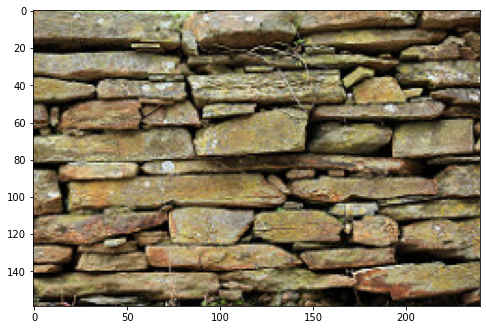

In [ ]:
# Import matplotlib
import matplotlib.pyplot as plt

# Load the image
data = plt.imread('bricks.png')

# Display the image
plt.imshow(data)
plt.show()

### Images as data: changing images

<div class=""><p>To modify an image, you can modify the existing numbers in the array. In a color image, you can change the values in one of the color channels without affecting the other colors, by indexing on the last dimension of the array. </p>
<p>The image you imported in the previous exercise is available in <code>data</code>.</p></div>

Instructions
<ul>
<li>Modify the bricks image to replace the top left corner of the image (10 by 10 pixels) into a red square.</li>
<li>Visualize the resulting image.</li>
</ul>

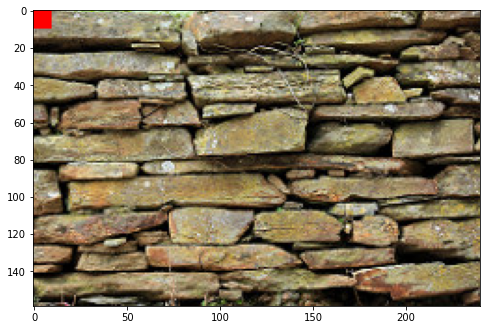

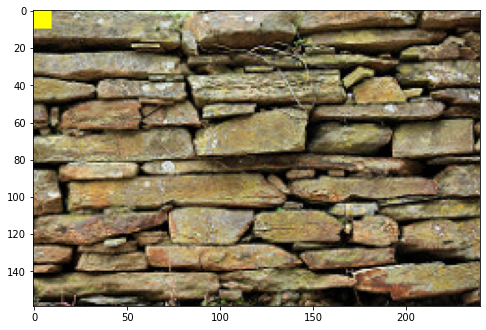

In [ ]:
# Set the red channel in this part of the image to 1
data[:10, :10, 0] = 1

# Set the green channel in this part of the image to 0
data[:10, :10, 1] = 0

# Set the blue channel in this part of the image to 0
data[:10, :10, 2] = 0

# Visualize the result
plt.imshow(data)
plt.show()

data[:10, :10, 0] = 1
data[:10, :10, 1] = 1
data[:10, :10, 2] = 0
plt.imshow(data)
plt.show()

## Classifying images

### Using one-hot encoding to represent images

<div class=""><p>Neural networks expect the labels of classes in a dataset to be organized in a one-hot encoded manner: each row in the array
contains zeros in all columns, except the column corresponding to a unique label, which is set to 1.</p>
<p>The fashion dataset contains three categories: </p>
<ol>
<li>Shirts </li>
<li>Dresses</li>
<li>Shoes </li>
</ol>
<p>In this exercise, you will create a one-hot encoding of a small sample of these labels.</p></div>

In [ ]:
labels = ['shoe', 'shirt', 'shoe', 'shirt', 'dress', 'dress', 'dress']

Instructions
<ul>
<li>Initialize the <code>ohe_labels</code> variable to hold the one-hot encoded array.</li>
<li>Use <code>np.where()</code> to find the location of the category of the item in each iteration in <code>categories</code>. </li>
<li>Assign a <code>1</code> into the correct row/column combination in every iteration.</li>
</ul>

In [ ]:
# The number of image categories
n_categories = 3

# The unique values of categories in the data
categories = np.array(["shirt", "dress", "shoe"])

# Initialize ohe_labels as all zeros
ohe_labels = np.zeros((len(labels), n_categories))

# Loop over the labels
for ii in range(len(labels)):
    # Find the location of this label in the categories variable
    jj = np.where(categories == labels[ii])
    # Set the corresponding zero to one
    ohe_labels[ii, jj] = 1

**You can use this array to test classification performance.**

### Evaluating a classifier

<div class=""><p>To evaluate a classifier, we need to test it on images that were not used during training. This is called "cross-validation": a prediction of the class (e.g., t-shirt, dress or shoe) is made from each of the test images, and these predictions are compared with the true labels of these images.</p>
<p>The results of cross-validation are provided as one-hot encoded arrays: <code>test_labels</code> and <code>predictions</code>.</p></div>

In [ ]:
test_labels = np.array([[0., 0., 1.], [0., 1., 0.], [0., 0., 1.], [0., 1., 0.], 
                        [0., 0., 1.], [0., 0., 1.], [0., 0., 1.], [0., 1., 0.]])

predictions = np.array([[0., 0., 1.], [0., 1., 0.], [0., 0., 1.], [1., 0., 0.], 
                        [0., 0., 1.], [1., 0., 0.], [0., 0., 1.], [0., 1., 0.]])

Instructions
<ul>
<li>Multiply the arrays with each other and sum the result to find the total number of correct predictions. </li>
<li>Divide the number of correct answers (the sum) by the length of <code>predictions</code> array to calculate the proportion of correct predictions.</li>
</ul>

In [ ]:
# Calculate the number of correct predictions
number_correct = (test_labels * predictions ).sum()
print(number_correct)

# Calculate the proportion of correct predictions
proportion_correct = number_correct / len(test_labels)
print(proportion_correct)

6.0
0.75


## Classification with Keras

### Build a neural network

<div class=""><p>We will use the <code>Keras</code> library to create neural networks and to train these neural networks to classify images. These models will all be of the <code>Sequential</code> type, meaning that the outputs of one layer are provided as inputs only to the next layer. </p>
<p>In this exercise, you will create a neural network with <code>Dense</code> layers, meaning that each unit in each layer is connected to all of the units in the previous layer. For example, each unit in the first layer is connected to all of the pixels in the input images. The <code>Dense</code> layer object receives as arguments the number of units in that layer, and the activation function for the units. For the first layer in the network, it also receives an <code>input_shape</code> keyword argument.</p>
<p><em>This course touches on a lot of concepts you may have forgotten, so if you ever need a quick refresher, download the <a href="https://datacamp-community-prod.s3.amazonaws.com/94fc681d-5422-40cb-a129-2218e9522f17" target="_blank" rel="noopener noreferrer">Keras Cheat Sheet</a> and keep it handy!</em></p></div>

Instructions
<ul>
<li>The first layer receives images as input, has 10 units and <code>'relu'</code> activation. </li>
<li>The second input layer has 10 units and <code>'relu'</code> activation.</li>
<li>The output layer has one unit for each category (3 categories) and <code>'softmax'</code> activation.</li>
</ul>

In [5]:
# Imports components from Keras
from keras.models import Sequential
from keras.layers import Dense

# Initializes a sequential model
model = Sequential()

# First layer
model.add(Dense(10, activation='relu', input_shape=(784,)))

# Second layer
model.add(Dense(10, activation='relu'))

# Output layer
model.add(Dense(3, activation='softmax'))

### Compile a neural network

<p>Once you have constructed a model in <code>Keras</code>, the model needs to be compiled before you can fit it to data. This means that you need to specify the optimizer that will be used to fit the model and the loss function that will be used in optimization. Optionally, you can also specify a list of metrics that the model will keep track of. For example, if you want to know the classification accuracy, you will provide the list <code>['accuracy']</code> to the <code>metrics</code> keyword argument.</p>

Instructions
<p>Write code to compile the model with the <code>'adam'</code> optimizer and <code>'categorical_crossentropy'</code> as the loss function.</p>

In [6]:
# Compile the model
model.compile(optimizer='adam', 
           loss='categorical_crossentropy', 
           metrics=['accuracy'])

**This neural network model is now ready to be fit to data.**

### Fitting a neural network model to clothing data

<div class=""><p>In this exercise, you will fit the fully connected neural network that you constructed in the previous exercise to image data. The training data is provided as two variables: <code>train_data</code> that contains the pixel data for 50 images of the three clothing classes and <code>train_labels</code>, which contains one-hot encoded representations of the labels for each one of these 50 images. Transform the data into the network's expected input and then fit the model on training data and training labels. </p>
<p>The <code>model</code> you compiled in the previous exercise, and <code>train_data</code> and <code>train_labels</code> are available in your workspace.</p></div>

In [3]:
%%capture
!wget https://github.com/lnunesAI/Datacamp/raw/main/2-machine-learning-scientist-with-python/19-image-processing-with-keras-in-python/datasets/fashion.h5
import h5py
h5f = h5py.File('fashion.h5','r')
train_data = h5f['train_data'][:]
train_labels = h5f['train_labels'][:]
test_data = h5f['test_data'][:]
test_labels = h5f['test_labels'][:]
h5f.close()

Instructions
<ul>
<li>Prepare the data for fitting by reshaping it.</li>
<li>Fit the model by passing the input training data and training labels to the model's <code>.fit()</code> method.</li>
</ul>

In [7]:
# Reshape the data to two-dimensional array
train_data = train_data.reshape((50, 784))

# Fit the model
model.fit(train_data, train_labels, validation_split=0.2, epochs=3)

Epoch 1/3
2/2 [==============================] - 1s 242ms/step - loss: 1.1399 - accuracy: 0.4146 - val_loss: 1.0795 - val_accuracy: 0.3000
Epoch 2/3
2/2 [==============================] - 0s 38ms/step - loss: 1.0646 - accuracy: 0.5875 - val_loss: 1.0501 - val_accuracy: 0.3000
Epoch 3/3
2/2 [==============================] - 0s 39ms/step - loss: 1.0067 - accuracy: 0.6354 - val_loss: 1.0156 - val_accuracy: 0.3000


**This model works well on the training data, but does it work well on test data?**

### Cross-validation for neural network evaluation

<div class=""><p>To evaluate the model, we use a separate test data-set. As in the train data, the images in the test data also need to be reshaped before they can be provided to the fully-connected network because the network expects one column per pixel in the input. </p>
<p>The <code>model</code> you fit in the previous exercise, and <code>test_data</code> and <code>test_labels</code> are available in your workspace.</p></div>

Instructions
<ul>
<li>Reshape the <code>test_data</code> so that it can be used to evaluate the model. </li>
<li>Evaluate the model on <code>test_data</code> using <code>test_labels</code>.</li>
</ul>

In [8]:
# Reshape test data
test_data = test_data.reshape((10, 784))

# Evaluate the model
model.evaluate(test_data, test_labels)

1/1 [==============================] - 0s 18ms/step - loss: 0.9228 - accuracy: 0.6000


[0.9228024482727051, 0.6000000238418579]

**The model cross-validates rather accurately.**